load data

In [23]:
# pip install gensim

In [1]:
import pandas as pd 
import numpy as np 
from gensim.models import FastText
import matplotlib.pyplot as plt
import json

In [2]:
data=pd.read_csv(r"preprocessed_data.csv")
data.head()

,Unnamed: 0,content,labels
0,0,{'tamil_sentences': ['தென்காசி தொகுதி புதிய தம...,0
1,1,{'tamil_sentences': ['அண்ணன் இதனை சூசகமாக மாதங...,1
2,2,{'tamil_sentences': ['ஒரு வருடம் ஆகி விட்டது இ...,2
3,3,{'tamil_sentences': ['எடப்பாடியை கண்டுகொள்ளாத ...,5
4,4,{'tamil_sentences': ['எங்களின் அரசியல் அடுத்த ...,2


preparing data for fasttext embedding model


In [3]:
lemma_vocab=set()

In [ ]:
# import traceback backup

# text_list = []
# labels = []
# with open('sentences.txt', 'w', encoding='utf-8') as f:
#     for i in range(len(data)):
#         try:
#             content = data['content'][i]
#             content = content.replace("'", '"')
#             content = json.loads(f"{content}")
#             text = content['tamil_sentences'][0] + ' ' + ' '.join(content['emojis']) + ' ' + ' '.join(content['tags'])
#             text_list.append(text.split())
#             for j in content['lemmas']:
#                 lemma_vocab.add(j)
#             f.writelines(f'{text}\n')
#             labels.append(data['labels'][i])
#         except Exception as e:
#             print(f"Error at index {i}: {e}")


In [4]:
import traceback

text_list = []
labels = []
with open('sentences_labels.txt', 'w', encoding='utf-8') as f:
    for i in range(len(data)):
        try:
            content = data['content'][i]
            content = content.replace("'", '"')
            content = json.loads(f"{content}")
            text = ' '.join(content['tokens']) +' '+ ' '.join(content['emojis']) + ' ' + ' '.join(content['tags'])
            text_list.append(text.split())
            for j in content['lemmas']:
                lemma_vocab.add(j)
            f.writelines(f'{text}\t{data["labels"][i]}\n')
            labels.append(data['labels'][i])
        except Exception as e:
            print(f"Error at index {i}: {e}")


Error at index 520: Invalid \escape: line 1 column 83 (char 82)
Error at index 527: Invalid \escape: line 1 column 69 (char 68)
Error at index 557: Invalid \escape: line 1 column 57 (char 56)
Error at index 1306: Expecting ',' delimiter: line 1 column 271 (char 270)
Error at index 1430: Invalid \escape: line 1 column 69 (char 68)
Error at index 1519: Invalid \escape: line 1 column 151 (char 150)
Error at index 1564: Invalid \escape: line 1 column 129 (char 128)
Error at index 1621: Invalid \escape: line 1 column 93 (char 92)
Error at index 1900: Expecting ',' delimiter: line 1 column 167 (char 166)
Error at index 2046: Invalid \escape: line 1 column 73 (char 72)
Error at index 3222: Invalid \escape: line 1 column 94 (char 93)
Error at index 3285: Invalid \escape: line 1 column 58 (char 57)
Error at index 3664: Invalid \escape: line 1 column 243 (char 242)
Error at index 3935: Invalid \escape: line 1 column 131 (char 130)
Error at index 4230: Invalid \escape: line 1 column 36 (char 35)


In [72]:
d={'Neutral':0, 'Substantiated':1, 'Opinionated':2, 'Positive':5, 'Sarcastic':4,
       'Negative':-5, 'None of the above':-1}
dreverse={}
for k,v in d.items():
    dreverse[v]=k   

In [73]:
text_list[3:4]

[['எடப்பாடியை',
  'கண்டுகொள்ளாத',
  'எடப்பாடி',
  'ஆதரிப்பீர்',
  'உதயசூரியன்',
  'மக்களின்குரல்',
  'ஓமலூர்',
  'சேலம்',
  'சேலம்',
  'செல்வகணபதி',
  'சேலம்தெற்கு',
  'சேலம்வடக்கு',
  'எடப்பாடி',
  'சேலம்மேற்கு',
  '🫢',
  '🌄',
  '🏴',
  '🚩',
  '#மக்களின்குரல்',
  '#ஓமலூர்',
  '#சேலம்',
  '#சேலம்4செல்வகணபதி',
  '#Vote4DMK',
  '#Vote4INDIA',
  '#Testimonials',
  '#சேலம்தெற்கு',
  '#சேலம்வடக்கு',
  '#எடப்பாடி',
  '#சேலம்மேற்கு',
  '#Eps',
  '#Edappadi',
  '#Palanisamy']]

analysis of data

In [74]:
dictionary={ i:set() for i in set(labels)}
total_vacb=set()

for i in range(len(text_list)):
    lab=labels[i]
    text=text_list[i]
    for t in text:
        total_vacb.add(t)
        dictionary[lab].add(t)


0

In [75]:
len(total_vacb),len(lemma_vocab)

(17429, 9605)

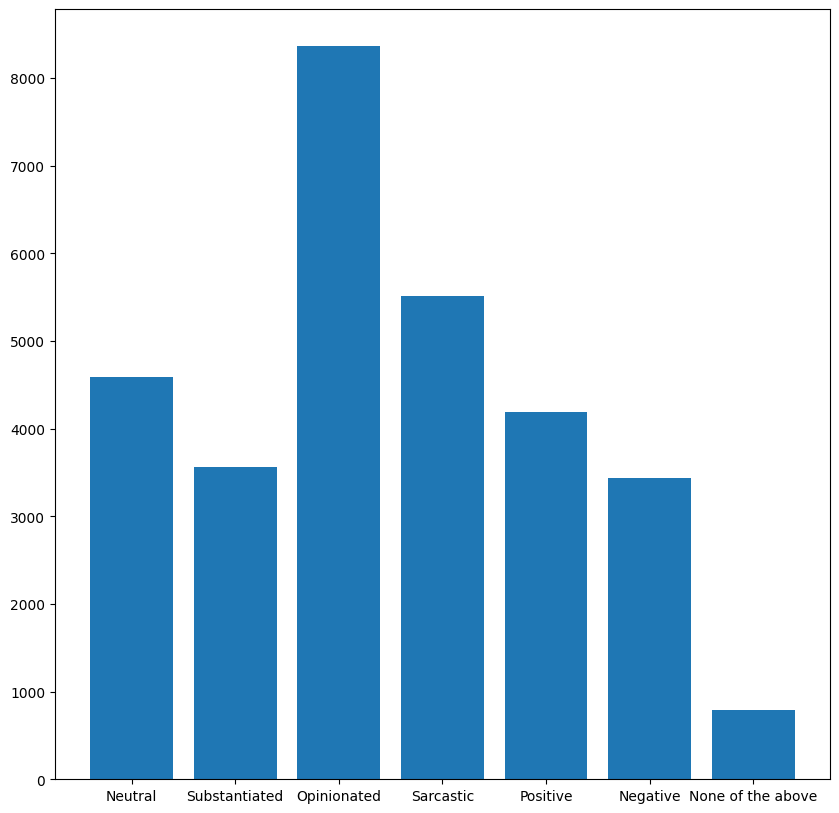

In [76]:
plt.figure(figsize=(10,10))
keys=dictionary.keys()
plt.bar([dreverse[i] for i in keys],[len(dictionary[k]) for k in keys])
plt.show()

In [77]:
keys

dict_keys([0, 1, 2, 4, 5, -5, -1])

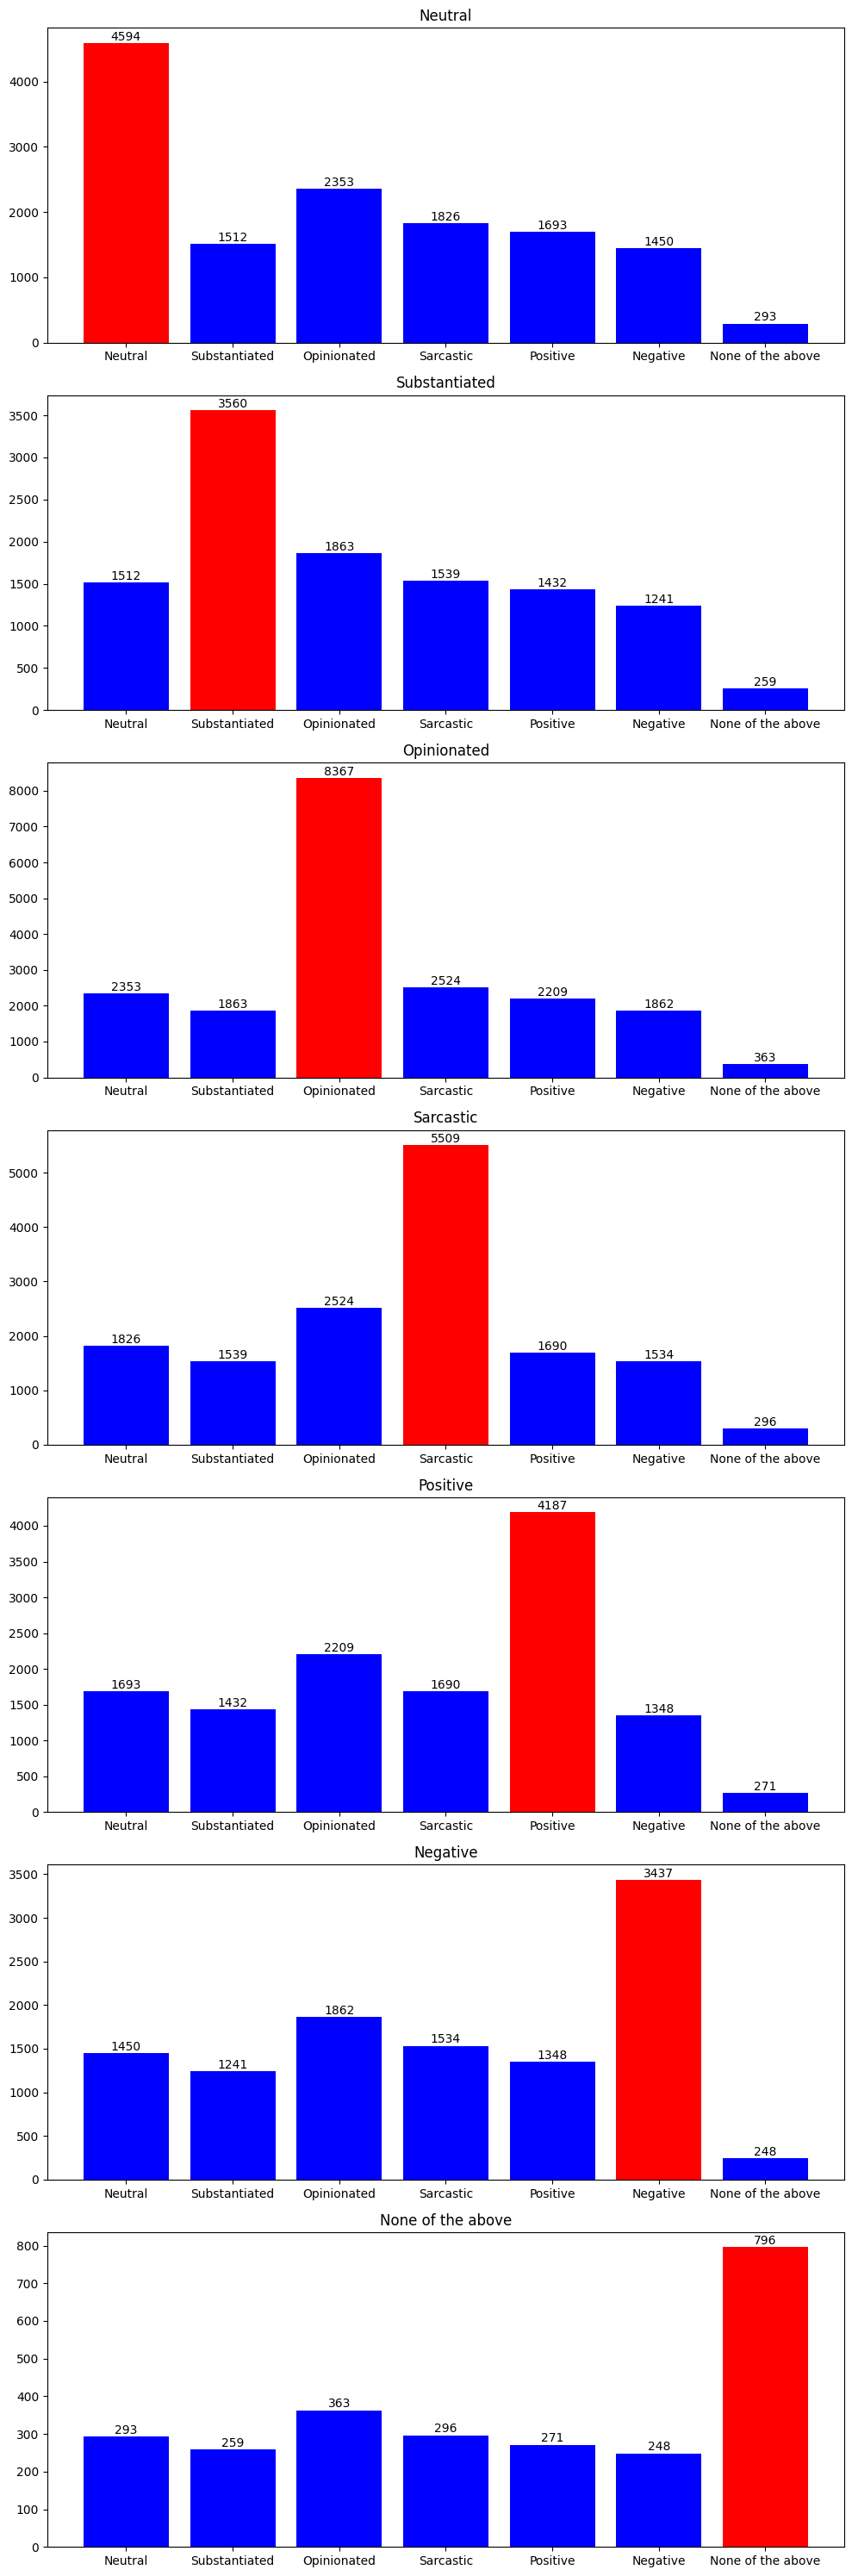

In [78]:
figure, axis = plt.subplots(7, 1, figsize=(10, 30))
for i, a in zip(keys, range(7)):
    values = [len(dictionary[k] & dictionary[i]) for k in keys]
    colors = ['red' if j == i else 'blue' for j in keys]
    bars = axis[a].bar([dreverse[j] for j in keys], values, color=colors)
    for bar, value in zip(bars, values):
        axis[a].text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 1,               
            str(value),                         
            ha='center', va='bottom', fontsize=10, color='black'
        )
    axis[a].set_title(dreverse[i])

plt.tight_layout()
plt.show()


In [79]:
unique_words_dict={}
for i in keys:
    temp=dictionary[i]
    for j in keys:
        if i!=j:
            temp=temp-dictionary[j]
    unique_words_dict[i]=temp

In [80]:
for key,value in unique_words_dict.items():
    print(f"Unique words in {dreverse[key]}: {len(value)} : {len(dictionary[key])}")

Unique words in Neutral: 1564 : 4594
Unique words in Substantiated: 1102 : 3560
Unique words in Opinionated: 4061 : 8367
Unique words in Sarcastic: 2261 : 5509
Unique words in Positive: 1364 : 4187
Unique words in Negative: 1054 : 3437
Unique words in None of the above: 352 : 796


In [81]:
distribution_dict={i:0 for i in keys}
unique_words_sentence_pair_dict={i:0 for i in keys}
for i in range(len(text_list)):
    text=text_list[i]
    label=labels[i]
    for word in text:
        if word in unique_words_dict[label]:
            unique_words_sentence_pair_dict[label]+=1
            break
    distribution_dict[label]+=1

In [86]:
for key,value in distribution_dict.items():
    print(f"Unique words in {dreverse[key]}: {value} : {unique_words_sentence_pair_dict[key]} sentence with unique class words : blocks {value-unique_words_sentence_pair_dict[key]}")

Unique words in Neutral: 634 : 449 sentence with unique class words : blocks 185
Unique words in Substantiated: 409 : 287 sentence with unique class words : blocks 122
Unique words in Opinionated: 1358 : 1111 sentence with unique class words : blocks 247
Unique words in Sarcastic: 790 : 638 sentence with unique class words : blocks 152
Unique words in Positive: 570 : 384 sentence with unique class words : blocks 186
Unique words in Negative: 405 : 298 sentence with unique class words : blocks 107
Unique words in None of the above: 171 : 136 sentence with unique class words : blocks 35


model

In [73]:
model=FastText(text_list,vector_size=240)

In [74]:
sentence_embeddings=[]

In [68]:
target_word="நாம்"
context_words =model.wv.most_similar(target_word, topn=10)
for word, similarity in context_words:
    print(f"{word}:{similarity:.4f}")

நாம்தமிழர்:0.9999
நாம்தமிழர்கட்சி:0.9999
#சீமானின்_சின்னம்_ஒலிவாங்கி_மைக்:0.9999
#சீமானின்_சின்னம்_ஒலிவாங்கி:0.9999
#நாம்தமிழர்கட்சி:0.9999
#மக்களின்_சின்னம்_ஒலிவாங்கி:0.9999
#Election2024:0.9999
#மக்களின்_சின்னம்_மைக்:0.9999
#Elections2024:0.9999
#நாம்தமிழர்:0.9999


In [76]:
len(labels)

4337

In [75]:
with open('sentences.txt','r',encoding='utf-8') as f:
    lines=f.readlines()
len(lines)

4337

In [82]:
from gensim.models import FastText

for sentence in lines:
    tokens = sentence.strip().split()  
    token_embeddings = [model.wv[token] for token in tokens if token in model.wv]

    if token_embeddings:
        sentence_embedding = sum(token_embeddings) / len(token_embeddings)
    else:
        sentence_embedding = None 
        print(1)
    sentence_embeddings.append(sentence_embedding)

In [83]:
len(sentence_embeddings)

4337

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [85]:
model=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(sentence_embeddings,labels)

In [86]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
pred=model.predict(x_test)
acc=accuracy_score(pred,y_test)
print(acc)

0.23317972350230415
